## Keras MNIST 手寫數字辨識

### 利用多層感知器模型(Multilayer perceptron)

In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# draw images of digits 1 to 9
def plot_img_of_digits(img, labels):
    fig, ax = plt.subplots(nrows = 2, ncols =5, sharex = True, sharey = True)
    ax = ax.flatten()
    
    for i in range(10):
        digits = img[labels == i][0].reshape(28, 28)
        ax[i].imshow(digits, cmap = 'Greys')
        ax[i].set_title('Label: {}'.format(i))
        
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()
    
def plot_prediction_img(img, labels, pred, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(img[idx], cmap = 'binary')
        title = 'Label: {}'.format(labels[idx])
        if len(pred) > 0:
            title += ', predict = {}'.format(pred[idx])
            
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
        
    plt.show()
    
def show_train_history(train_history, train, validation):
    # 顯示訓練過程的準確度及驗證結果
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
        
(X_train_images, y_train_labels), \
    (X_test_images, y_test_labels) = mnist.load_data()
    
print('Train Data: {}, {} 維'.format(X_train_images.shape, X_train_images.ndim))
print('Test Data: {}, {} 維'.format(X_test_images.shape, X_test_images.ndim))

Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Train Data: (60000, 28, 28), 3 維
Test Data: (10000, 28, 28), 3 維


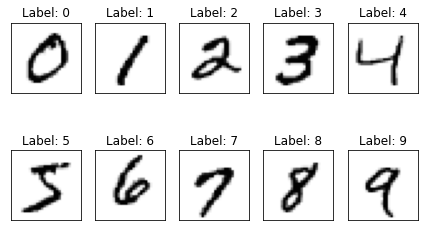

In [2]:
plot_img_of_digits(X_train_images, y_train_labels)

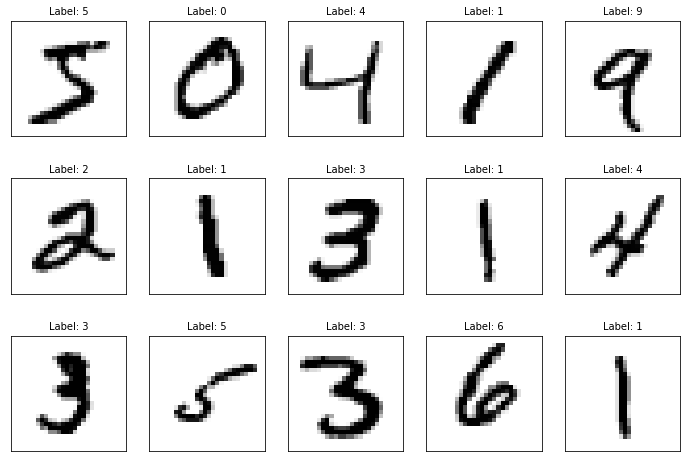

In [3]:
plot_prediction_img(X_train_images, y_train_labels, [], 0, 15)

### 資料預處理

In [4]:
# 把資料轉換成浮點數並改變陣列維度，例如把(60000,28,28)轉換成(60000,784)
X_train = X_train_images.reshape(60000, 28 * 28)
X_train = X_train.astype("float32") / 255

X_test = X_test_images.reshape(10000, 28 * 28)
X_test = X_test.astype("float32") / 255

# 把標籤資料轉換成one-hot格式
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

print('Train Label: {}'.format(y_train_labels[:5]))
print('Train Label transform to One Hot: {}'.format(y_train[:5]))

Train Label: [5 0 4 1 9]
Train Label transform to One Hot: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### 建立模型

In [5]:
network = Sequential()
network.add(Dense(256, activation='relu', kernel_initializer= 'normal', 
                  input_shape = (28 * 28, ))) # 建立隱藏層
network.add(Dense(10, activation='softmax', kernel_initializer= 'normal')) 

In [6]:
# 觀察模型的摘要
print('Moder Summary: \n', network.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Moder Summary: 
 None


### 訓練模型

In [7]:
network.compile(optimizer='adam', loss='categorical_crossentropy', 
                metrics=['accuracy'] ) # 需使用compile對模型進行設定
train_history = network.fit(X_train, y_train, epochs=10, 
                            batch_size=200, validation_split=0.2, 
                            verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4339 - accuracy: 0.8857 - val_loss: 0.2123 - val_accuracy: 0.9427
Epoch 2/10
 - 5s - loss: 0.1923 - accuracy: 0.9454 - val_loss: 0.1560 - val_accuracy: 0.9572
Epoch 3/10
 - 6s - loss: 0.1350 - accuracy: 0.9614 - val_loss: 0.1297 - val_accuracy: 0.9621
Epoch 4/10
 - 6s - loss: 0.1032 - accuracy: 0.9707 - val_loss: 0.1117 - val_accuracy: 0.9663
Epoch 5/10
 - 5s - loss: 0.0821 - accuracy: 0.9771 - val_loss: 0.1007 - val_accuracy: 0.9705
Epoch 6/10
 - 5s - loss: 0.0666 - accuracy: 0.9815 - val_loss: 0.0971 - val_accuracy: 0.9721
Epoch 7/10
 - 6s - loss: 0.0560 - accuracy: 0.9847 - val_loss: 0.0943 - val_accuracy: 0.9731
Epoch 8/10
 - 5s - loss: 0.0467 - accuracy: 0.9876 - val_loss: 0.0873 - val_accuracy: 0.9747
Epoch 9/10
 - 5s - loss: 0.0383 - accuracy: 0.9904 - val_loss: 0.0838 - val_accuracy: 0.9762
Epoch 10/10
 - 5s - loss: 0.0318 - accuracy: 0.9921 - val_loss: 0.0798 - val_accuracy: 0.9763


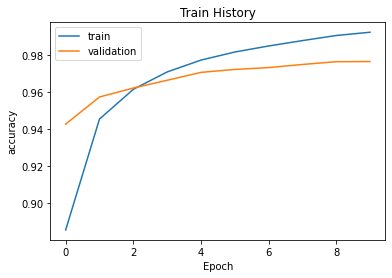

In [8]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

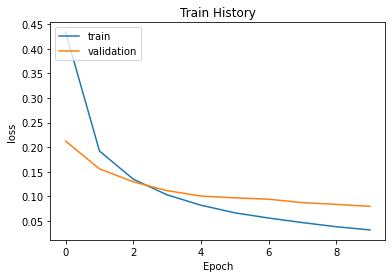

In [9]:
show_train_history(train_history, 'loss', 'val_loss')

### 測試評估，利用測試組評估模型

In [10]:
test_loss, test_acc = network.evaluate(X_test, y_test)

print('Test accuracy: {}'.format(test_acc))

10000/10000 [==============================] - 0s 40us/step
Test accuracy: 0.9783999919891357


In [11]:
# 進行預測
X_test_pred = X_test_images.reshape(10000, 28 * 28).astype('float32')
prediction = network.predict_classes(X_test_pred)

#### 若predict_classes執行發生'Model' object has no attribute 'predict_classes' 的問題，可改用下列方式替代：
> 
> predict = model.predict(img)
>
> predict=np.argmax(predict,axis=1)
>

Predict: [3 6 1 3 8 1 0 5 1 3]


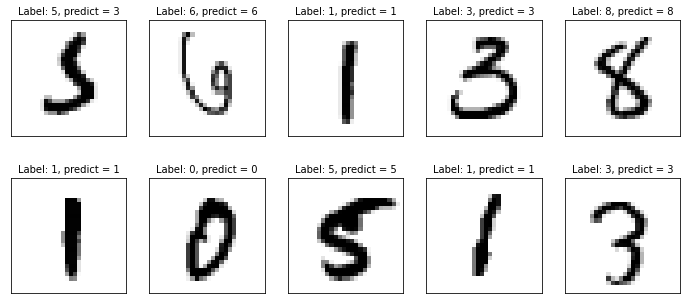

In [12]:
print('Predict: {}'.format(prediction[340:350]))
plot_prediction_img(X_test_images, y_test_labels, prediction, idx=340)

### 利用混淆矩陣(confusion matrix)及視覺化的方式觀察監督式學習情況

In [ ]:
# 利用Pandas的crosstab建立混淆矩陣
import pandas as pd
pd